In [2]:
import requests
import json

lat = "40.8677"
long = "-73.9212"
genius = requests.get(f"https://api.weather.gov/points/{lat},{long}")

json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/40.8677,-73.9212',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-73.9212, 40.8677]},
 'properties': {'@id': 'https://api.weather.gov/p

In [3]:
forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

json_1 = new_request.json()
json_1

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-73.9365135, 40.8719762],
    [-73.9409988, 40.8503159],
    [-73.91236690000001, 40.846922],
    [-73.9078757, 40.8685819],
    [-73.9365135, 40.8719762]]]},
 'properties': {'updated': '2023-03-20T22:09:19+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-21T02:09:08+00:00',
  'updateTime': '2023-03-20T22:09:19+00:00',
  'validTimes': '2023-03-20T16:00:00+00:00/P7DT21H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 10.0584},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-20T22:00:00-04:00',
    'endTime': '2023-03-21T06:00:00-04:00',
    'isD

In [4]:
import csv

data_file = open("weather_data.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["Name", "Temperature", "Detailed Forecast"])

full = json_1["properties"]["periods"]
full

full[0]["name"]
full[0]["temperature"]
full[0]["detailedForecast"]

for i in full:
    name = i['name']
    temp = i['temperature']
    forecast = i['detailedForecast']
    print(name)
    print(temp)
    print(forecast)
    
    csv_writer.writerow([name, temp, forecast])

data_file.close()

Tonight
35
Mostly clear, with a low around 35. Southwest wind around 7 mph.
Tuesday
62
Sunny, with a high near 62. Southwest wind 3 to 13 mph.
Tuesday Night
41
Mostly cloudy. Low around 41, with temperatures rising to around 43 overnight. Southwest wind 2 to 9 mph.
Wednesday
60
A slight chance of rain showers after 2pm. Mostly cloudy. High near 60, with temperatures falling to around 57 in the afternoon. South wind 3 to 14 mph. Chance of precipitation is 20%.
Wednesday Night
48
A slight chance of rain showers. Mostly cloudy, with a low around 48. South wind 9 to 14 mph. Chance of precipitation is 20%.
Thursday
64
A chance of rain showers. Cloudy. High near 64, with temperatures falling to around 62 in the afternoon. Chance of precipitation is 50%.
Thursday Night
49
A chance of rain showers. Cloudy, with a low around 49. Chance of precipitation is 50%.
Friday
55
Rain showers likely. Cloudy, with a high near 55. Chance of precipitation is 60%.
Friday Night
43
A chance of rain showers. Cl

In [5]:
import pandas as pd

weather = pd.read_csv("weather_data.csv")
weather

,Name,Temperature,Detailed Forecast
0,Tonight,35,"Mostly clear, with a low around 35. Southwest ..."
1,Tuesday,62,"Sunny, with a high near 62. Southwest wind 3 t..."
2,Tuesday Night,41,"Mostly cloudy. Low around 41, with temperature..."
3,Wednesday,60,A slight chance of rain showers after 2pm. Mos...
4,Wednesday Night,48,A slight chance of rain showers. Mostly cloudy...
5,Thursday,64,A chance of rain showers. Cloudy. High near 64...
6,Thursday Night,49,"A chance of rain showers. Cloudy, with a low a..."
7,Friday,55,"Rain showers likely. Cloudy, with a high near ..."
8,Friday Night,43,"A chance of rain showers. Cloudy, with a low a..."
9,Saturday,50,"Rain showers likely. Cloudy, with a high near ..."


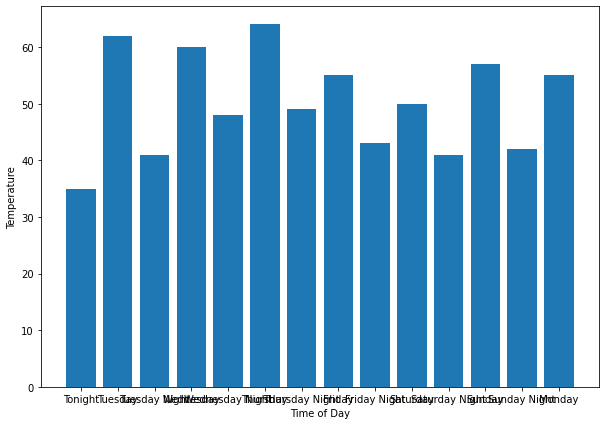

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.DataFrame(weather)

name = df["Name"]
temp = df["Temperature"]

fig = plt.figure(figsize = (10,7))
plt.bar(name[0:20], temp[0:20])

plt.xlabel("Time of Day")
plt.ylabel("Temperature")
plt.show()

In [7]:
#THE DOCUMENTATION:

#1. /api/v3/CountryInfo/{countryCode} -> gets country info for the given country
#2. /api/v3/AvailableCountries -> get all available countries
#3. /api/v3/LongWeekend/{year}/{countryCode} -> get long weekends for a given country
#4. /api/v3/PublicHolidays/{year}/{countryCode} -> get public holidays
#5. /api/v3/IsTodayPublicHoliday/{countryCode} -> is today a public holiday?
#6. /api/v3/NextPublicHolidays/{countryCode} -> returns the upcoming public holidays for the next 365 days for the given country
#7. /api/v3/NextPublicHolidaysWorldwide -> returns the upcoming public holidays for the next 7 days

In [8]:
country_codes = ["EG", "IT", "CL", "HN", "BO", "JP", "MX", "HR", "CA", "KR"]

for i in country_codes:
    upcoming_holidays = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/{i}")
    
    holidays_upcoming = upcoming_holidays.json()
    
    print(holidays_upcoming)
    
    number_h = len(holidays_upcoming)
    
    print(f"Number of Holidays: {number_h}")


[{'date': '2023-04-25', 'localName': 'عيد تحرير سيناء', 'name': 'Sinai Liberation Day', 'countryCode': 'EG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-05-01', 'localName': 'عيد العمال', 'name': 'Labour Day', 'countryCode': 'EG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-07-23', 'localName': 'عيد ثورة 23 يوليو', 'name': 'Revolution Day', 'countryCode': 'EG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-10-06', 'localName': 'عيد القوات المسلحة', 'name': 'Armed Forces Day', 'countryCode': 'EG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2024-01-07', 'localName': 'عيد الميلاد المجيد', 'name': 'Christmas', 'countryCode': 'EG', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2024-01-25', 'localNam

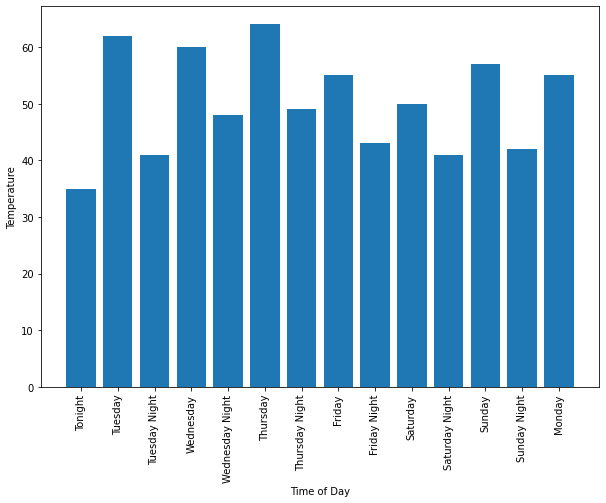

In [13]:
#BONUS 1

from matplotlib import pyplot as plt
import numpy as np

df = pd.DataFrame(weather)

name = df["Name"]
temp = df["Temperature"]

fig = plt.figure(figsize = (10,7))
plt.bar(name[0:20], temp[0:20])

plt.xlabel("Time of Day")
plt.ylabel("Temperature")
plt.xticks(rotation = 90)
plt.show()

#source: https://stackabuse.com/rotate-axis-labels-in-matplotlib/